# Requirements
Requirements
Conduct your analysis using a cross-validation design.</br>
Conduct EDA and provide appropriate visualizations in the process.</br>
Build a minimum of two separate regression models using the training set.</br>
Evaluate polynomial, indicator, dichotomous, & piecewise model components.</br>
Create at least one feature from the data set.</br>
Evaluate the models’ assumptions.</br>
Evaluate goodness of fit metrics on the training and validation sets.</br>
Submit predictions for the unseen test set available on Kaggle.com.</br>
Provide your Kaggle user name and a screen snapshot of your Kaggle scores.</br>
Discuss what your models tell you in layman’s terms</br>



In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd
import statsmodels.api as sm
import missingno as msno

import scipy
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [26]:
test_data = pd.read_csv('/Users/Nora/MSDS422/TrainTest/test.csv')
train_data = pd.read_csv('/Users/Nora/MSDS422/TrainTest/train.csv')

unseen_test = pd.read_csv('/Users/Nora/MSDS422/TrainTest/sample_submission.csv')
target_col = train_data['SalePrice']

# graph of SalePrice

<Axes: xlabel='SalePrice'>

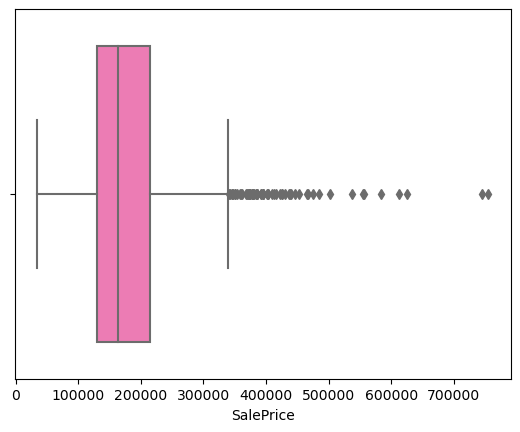

In [3]:
#outlier detection 
import seaborn as sns
sns.boxplot(x=train_data['SalePrice'], color='hotpink')

Skewness after log:  0.12133506220520406


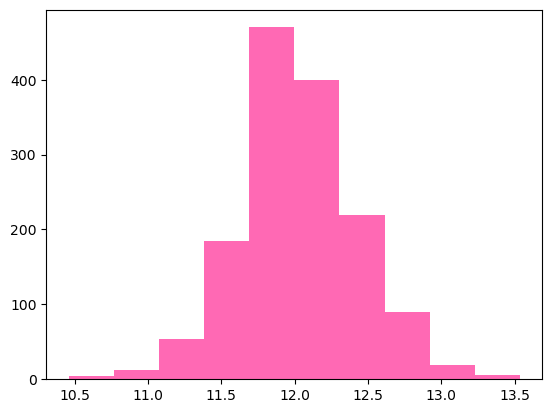

In [4]:
##I used a log function to normalize the data

print("Skewness after log: ", np.log(train_data.SalePrice).skew())

plt.hist(np.log(train_data.SalePrice), color='hotpink')
plt.show()

target= np.log(train_data.SalePrice)

In [5]:
# deal with missing values
train = train_data.select_dtypes(include=[np.number]).interpolate().dropna()

y = np.log(train_data.SalePrice)
#drop original dependent var and id 
X = train.drop(['Id','SalePrice'], axis=1)

/var/folders/mr/j15l_l8x2jgd3dvd9tnt8hcw0000gs/T/ipykernel_40376/832885271.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_data.corr()


<Axes: >

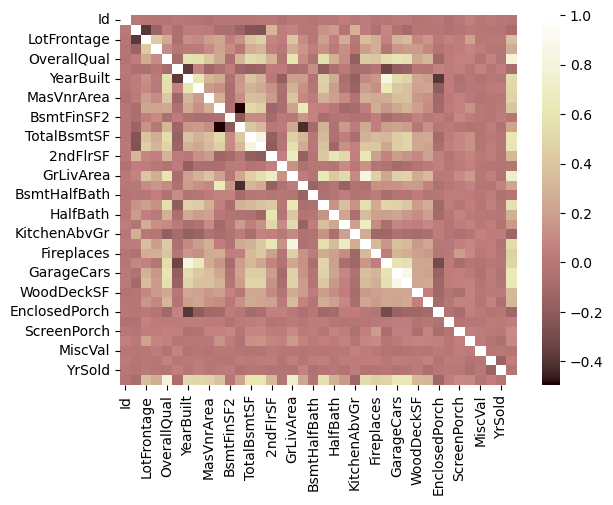

In [22]:
corr = train_data.corr()
sns.heatmap(corr, cmap='pink')

<Axes: >

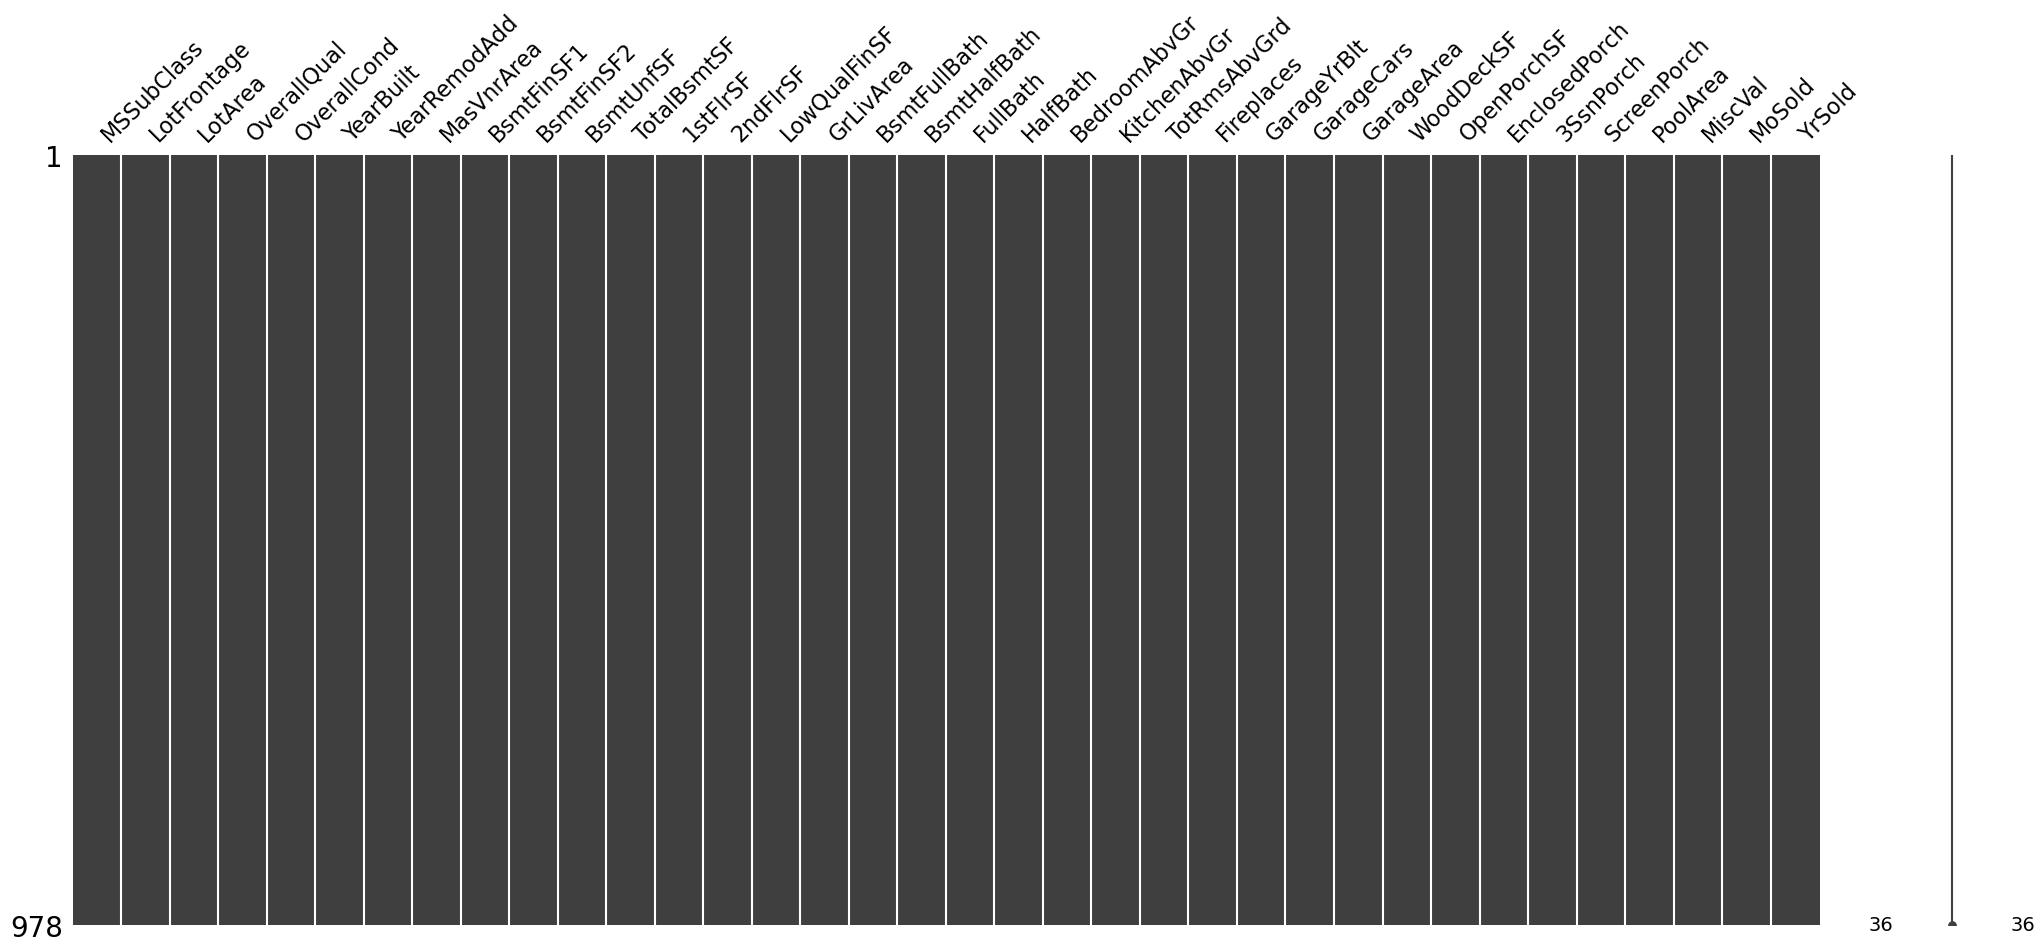

In [28]:
'''Using the missingno Python library to Identify and Visualise Missing Data Prior to Machine Learning
I like this split because it helps us identify any lacking data, the testing data is fully completed and there are no missing values
'''

msno.matrix(X_train)

# K fold

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2, test_size=.33)
#Hyper paramteter tuning  example 

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
#Hyper parameter tuning example 
gbm = xgb.XGBRegressor()
reg_cv = GridSearchCV(gbm, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                            ,'max_depth': [3,4,6], 'n_estimators': [500,1000]}, verbose=1)
reg_cv.fit(X_train,y_train)
reg_cv.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'colsample_bytree': 1.0,
 'max_depth': 3,
 'min_child_weight': 1.2,
 'n_estimators': 500}

In [7]:
gbm = xgb.XGBRegressor(**reg_cv.best_params_)
gbm.fit(X_train,y_train)
##############
submit= pd.DataFrame()
submit['Id'] = test_data.Id
test_features = test_data.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
preds = gbm.predict(test_features)
final_preds = np.exp(preds)
print('Original preds :\t', preds[:5])
print('Final preds :\t', final_preds[:5])
submit['SalePrice'] = final_preds
#final submission  
submit.to_csv('xgb_hyper_param_subm.csv', index=False)
print('XGB submission using hyper param tuning code  created')

Original preds :	 [11.723221 11.921304 12.093929 12.193757 11.989782]
Final preds :	 [123404.24 150437.61 178783.22 197551.98 161100.28]
XGB submission using hyper param tuning code  created


# Simple Lin Reg

In [11]:
model = LinearRegression()
model.fit(X_train , y_train)
LinearRegression()
# Get result

r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

coefficient of determination: 0.90483344852141
intercept: 19.977959150338975
slope: [-3.42789860e-04  7.28976246e-04  2.16992526e-06  6.60927773e-02
  5.09934586e-02  3.20314103e-03  1.43552012e-03  4.35552654e-06
  8.96265990e-05  2.05713411e-05  1.57896849e-05  1.25987625e-04
  8.80207250e-05  9.70469793e-05 -2.80748100e-05  1.56992894e-04
  2.46291701e-02  2.46148256e-03  1.99294487e-02  1.02149429e-02
 -1.69556915e-02 -4.45004250e-02  1.40477523e-02  3.82267148e-02
 -2.69653256e-05  2.77789536e-02  7.07084809e-05  7.39046065e-05
 -4.02805938e-05  1.56588639e-04  9.64396661e-05  3.75694793e-04
 -2.78557217e-04 -3.49643438e-06  2.07054017e-04 -9.22462327e-03]


In [13]:
# Predict responses

y_pred = model.predict(X_train)

print('predicted response:', y_pred, sep='\n')


predicted response:
[11.2443024  11.95380574 12.02831322 12.0558121  12.37299775 11.9585281
 12.31902468 11.74210122 11.6564645  11.80338192 11.86037641 12.03037632
 12.07644477 11.94354238 11.44270794 11.86011319 11.67049351 12.18374042
 12.23991732 12.17953925 11.60019238 11.78313802 11.7755622  12.7012454
 12.37593611 11.74758028 11.92333426 11.52090171 12.42724822 11.65754107
 11.88569157 11.33505653 11.51579229 12.19386421 12.53088603 11.64600127
 11.05738438 12.66600796 12.20709868 12.15068859 11.74288379 11.73642742
 11.79440992 11.79753779 12.36746268 11.30911985 11.93706352 12.00860276
 11.97840152 11.69669618 12.25455107 11.3255274  12.13404199 12.82680713
 12.69848766 12.42576579 12.10759622 12.71375202 11.52614762 11.97487953
 11.87922817 12.70516249 11.89841057 11.90099404 12.68083179 12.03697301
 12.13473083 11.2412162  12.24853426 12.10255982 12.09252452 11.91780035
 12.06884857 11.65740382 11.56930294 12.08875891 12.49643073 12.44579654
 11.74279179 11.45042618 12.16200

In [29]:
submit.to_csv('subm.csv', index=False)

# Evaluating goodness of fit

In [40]:
import numpy as np
import pandas as pd
import scipy.stats as stats

train_df = pd.DataFrame(train_data)

In [45]:
# Fit the distribution to the data
dist = stats.norm
params = dist.fit(target_col)

# Perform the goodness-of-fit test
_, p_value = stats.kstest(target_col, dist.cdf, args=params)

# Print the p-value
print("Goodness of Fit p-value:", p_value)

Goodness of Fit p-value: 6.402139779190053e-20
